# 반려동물 안구질환 판정 모델

##### 해당 모델은 AI hub의 제공 데이터셋을 활용했습니다.

### 데이터셋 입력

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import json
import os, glob
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from tensorflow import keras

In [9]:
caltech_dir = '/Users/hk/Desktop/AI/Project/PEDD/dataset/pet_eyedisease/train'
categories = ['Y', 'N']
nb_classes = len(categories)

In [13]:
image_w = 256
image_h = 256

pixels = image_h * image_w * 3

X = []
Y = []

for idx, cat in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    
    image_dir = caltech_dir + '/' + cat
    files = glob.glob(image_dir+'/*.jpg')
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert('RGB')
        img = img.resize((256, 256))
        data = np.asarray(img)
        
        X.append(data)
        Y.append(label)

In [14]:
X = np.array(X)
Y = np.array(Y)

In [15]:
train_input, val_input, train_target, val_target = train_test_split(
    X, Y, test_size=0.2)

In [16]:
train_input.shape

(753, 256, 256, 3)

### 모델 생성

In [17]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(12, 12), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(8, 8)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, kernel_size=(12, 12), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(8, 8)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(nb_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      13856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        294976    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

### 훈련

In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_input, train_target, epochs=20,
                   validation_data=(val_input, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
24/24 [==============================] - 27s 1s/step - loss: 6.7356 - accuracy: 0.6574 - val_loss: 0.5866 - val_accuracy: 0.6984
Epoch 2/20
24/24 [==============================] - 27s 1s/step - loss: 0.5195 - accuracy: 0.7397 - val_loss: 0.4727 - val_accuracy: 0.8783
Epoch 3/20
24/24 [==============================] - 28s 1s/step - loss: 0.4363 - accuracy: 0.8287 - val_loss: 0.3234 - val_accuracy: 0.9153
Epoch 4/20
24/24 [==============================] - 27s 1s/step - loss: 0.3603 - accuracy: 0.8845 - val_loss: 0.2406 - val_accuracy: 0.9153
Epoch 5/20
24/24 [==============================] - 27s 1s/step - loss: 0.3562 - accuracy: 0.8752 - val_loss: 0.3305 - val_accuracy: 0.9153
Epoch 6/20
24/24 [==============================] - 27s 1s/step - loss: 0.3103 - accuracy: 0.8924 - val_loss: 0.2251 - val_accuracy: 0.9259
Epoch 7/20
24/24 [==============================] - 28s 1s/step - loss: 0.2169 - accuracy: 0.9283 - val_loss: 0.1649 - val_accuracy: 0.9418
Epoch 8/20
24/24 [==

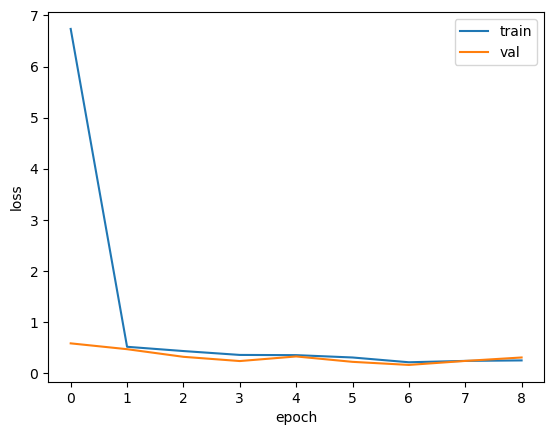

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 모델 평가

In [21]:
model.evaluate(val_input, val_target)

6/6 [==============================] - 1s 116ms/step - loss: 0.1649 - accuracy: 0.9418


[0.16492673754692078, 0.9417989253997803]